In [10]:
import numpy as np 
import pandas as pd
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import matplotlib.pyplot as plt
import torch
torch.cuda.empty_cache()

dirList = os.listdir("/kaggle/input/traffic-signs-reduced-images/archive(1)/Train")#[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 5, 6, 7, 8, 9] #os.listdir("/kaggle/input/traffic-signs-v4/archive(1)/Train") 
finDirList = [str(x) for x in dirList]
dictMapping = {}
z=0
for y in dirList:
    dictMapping[z] = y
    z+=1
trainData, valData = keras.utils.image_dataset_from_directory("/kaggle/input/traffic-signs-reduced-images/archive(1)/Train", labels="inferred", label_mode="int", batch_size=64, image_size=(200,200), validation_split=0.3, subset="both", seed=42, shuffle=True, class_names=finDirList)

Found 1032 files belonging to 43 classes.
Using 723 files for training.
Using 309 files for validation.


22
(200, 200, 3)


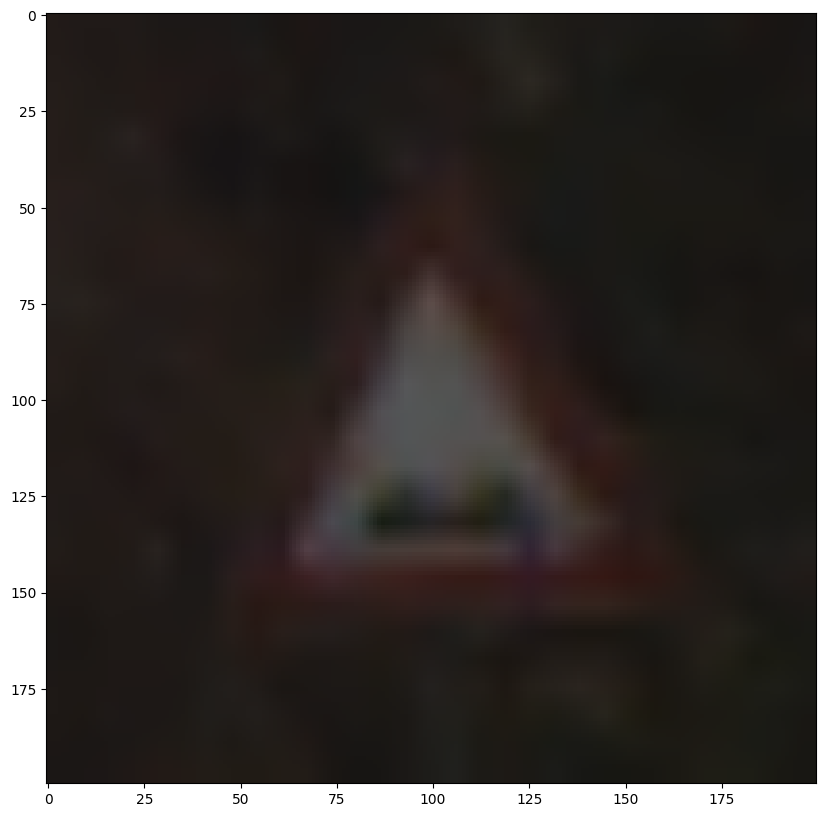

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in trainData.take(1):
    plt.imshow(np.array(images[35]).astype("uint8"))
    value = dictMapping[int(labels[35])]
    print(value)
    print((np.array(images[35]).astype("uint8")).shape)

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(200,200,3)))
model.add(keras.layers.Rescaling(scale=1.0/255))
model.add(keras.layers.Conv2D(filters=4, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(64, 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(43, 'linear'))
model.add(keras.layers.Softmax())

In [14]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [15]:
model.fit(trainData, epochs=30,  validation_data=valData)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0190 - loss: 3.8322 - val_accuracy: 0.0194 - val_loss: 3.7619
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.0317 - loss: 3.7450 - val_accuracy: 0.0162 - val_loss: 3.7628
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0335 - loss: 3.7267 - val_accuracy: 0.0097 - val_loss: 3.7633
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0305 - loss: 3.6904 - val_accuracy: 0.0129 - val_loss: 3.7638
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0613 - loss: 3.6331 - val_accuracy: 0.0259 - val_loss: 3.7642
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0648 - loss: 3.5967 - val_accuracy: 0.0259 - val_loss: 3.7642
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0689 - loss: 3.5879 - val_accuracy: 0.0259 - val_loss: 3.7631
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0743 - loss: 3.5383 - val_accuracy: 0.0259 - v

In [16]:
model.save("/kaggle/working/finalcnn_model.keras")

In [17]:
finalDir = "/kaggle/input/traffic-signs-reduced-images/archive(1)/Test"
os.chdir(finalDir)
results = []
for z in os.listdir():
    splitFile = z.split("_")
    concatPath = os.path.join(finalDir, z)
    imageTest = keras.utils.load_img(concatPath, target_size=(200,200))
    img_array = keras.utils.img_to_array(imageTest)
    img_array = keras.ops.expand_dims(img_array, 0)
    predict = model.predict(img_array, verbose=False)
    predict = np.argmax(predict[0])
    predClass = dictMapping[predict]
    if splitFile[0] == predClass:
        results.append(True)
    else:
        results.append(False)

In [18]:
numTrues = 0
for x in results:
    if x == True:
       numTrues+=1
numTrues/len(results)

0.030245447347585115